In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

C:\Users\surajshukla\AppData\Local\Temp\ipykernel_19548\689322132.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("house_prices_preprocessed.csv")

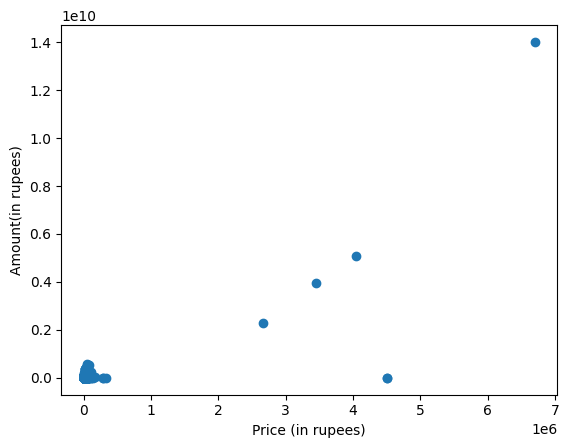

In [3]:
# target = "Amount(in rupees)"
# y = df[target]
# t = df.drop(columns=[target], axis=1)
# # features = t.columns
# print(features)
# for i, feature in enumerate(features[:9]):
#     plt.subplot(3, 3, i+1)
#     plt.scatter(df[feature], y)
#     plt.title(feature)

x_column = "Price (in rupees)"
y_column = "Amount(in rupees)"

plt.scatter(df[x_column], df[y_column])

plt.xlabel(x_column)

plt.ylabel(y_column)

plt.show()

In [4]:
target = "Amount(in rupees)"
y = np.array(df[target])
# X = np.array(df.drop(columns=[target], axis=1))
X = np.array(df["Price (in rupees)"]).reshape(-1,1)

del df 

In [5]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del X_, y_

print(f"the shape of the training set (input) is: {X_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {X_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {X_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (91888, 1)
the shape of the training set (target) is: (91888,)

the shape of the cross validation set (input) is: (30630, 1)
the shape of the cross validation set (target) is: (30630,)

the shape of the test set (input) is: (30630, 1)
the shape of the test set (target) is: (30630,)


In [6]:
# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train = scaler_linear.fit_transform(X_train)

# print(X_train_scaled.shape)
mean_value = scaler_linear.mean_.squeeze()
std_value = scaler_linear.scale_.squeeze()


print(mean_value.shape, std_value.shape)
print(mean_value)
print(std_value)

# print(f"Computed mean of the training set: {mean_value:.2f}")
# print(f"Computed standard deviation of the training set: {std_value:.2f}")

() ()
7713.175365662546
36542.69529224968


In [7]:
lr_model = LinearRegression()
reg = lr_model.fit(X_train, y_train)

reg.score(X_train, y_train)

0.5978145334979909

In [8]:
yhat = lr_model.predict(X_train)

print(yhat[:10], y_train[:10])
print(f"training log_loss (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")

[ 7710810.33148912  8075722.53176421 15880789.03764795 12462552.84062671
  9714448.61633287  8798789.29897595 16710851.66605145 10332772.06679899
  8075722.53176421 12678797.10745639] [ 2500000.  4000000. 23500000.  7500000.  9000000.  2400000. 21000000.
 10700000.  3400000. 20500000.]
training log_loss (using sklearn function): 569793916405811.2


In [9]:
X_cv = scaler_linear.transform(X_cv)

# print(f"Mean used to scale the CV set: {scaler_linear.mean_.squeeze():.2f}")
# print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze():.2f}")

# Feed the scaled cross validation set
yhat = lr_model.predict(X_cv)

# Use scikit-learn's utility function and divide by 2
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Cross validation MSE: 44117151231946.02


In [10]:
X_test = scaler_linear.transform(X_test)

# print(f"Mean used to scale the CV set: {scaler_linear.mean_.squeeze():.2f}")
# print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze():.2f}")

# Feed the scaled cross validation set
yhat = lr_model.predict(X_test)

# Use scikit-learn's utility function and divide by 2
print(f"Test MSE: {mean_squared_error(y_test, yhat) / 2}")

Test MSE: 59998522538327.67
